In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [ ]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [ ]:
test=pd.read_csv('social_network_ads_test.csv')
train=pd.read_csv('social_network_ads_train.csv')

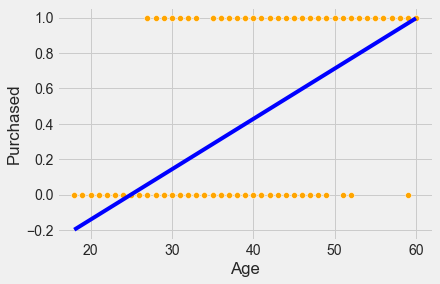

In [7]:
sns.scatterplot(x='Age',y='Purchased', data=train, color='orange')
lm= sm.ols(formula='Purchased~Age', data=train).fit()
sns.lineplot(x = 'Age', y= lm.predict(train), data = train, color = 'blue') #Visualizing model
plt.show()

Classes are not perfectly separable, there will be misclassification. It is inevitable 
Linear Reg is not working - so no OLS

Optimization terminated successfully.
         Current function value: 0.430107
         Iterations 7


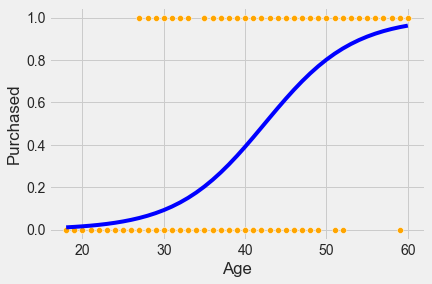

In [8]:
#traning a log reg model
sns.scatterplot(x='Age',y='Purchased', data=train, color='orange')
logit_model= sm.logit(formula='Purchased~Age', data=train).fit()
sns.lineplot(x = 'Age', y= logit_model.predict(train), data = train, color = 'blue') #Visualizing model
plt.show()

Note the gradual change in the transition zone
    Typical for data that is not perfectly classifiable

In [9]:
#let's see the summary
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  300
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            1
Date:                Wed, 15 Feb 2023   Pseudo R-squ.:                  0.3378
Time:                        12:56:57   Log-Likelihood:                -129.03
converged:                       True   LL-Null:                       -194.85
Covariance Type:            nonrobust   LLR p-value:                 1.805e-30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8102      0.885     -8.825      0.000      -9.545      -6.076
Age            0.1842      0.022      8.449      0.000       0.141       0.227


Interpret the coeff: for a unit increase in age 
    the log-odds of being purchaged increase by 0.18
    that means the odds increase by np.exp(0.18)=1.2

Age is statistically sig. p-value for the z-test is < 0.05
LLR p-value is also < 0.05 - overall test stat. sig. 

Do teh same thing with gender instead of age 
    not stat. sig., not a good fit either 

In [13]:
#Created and interpreted the model- let's see the mterics now 

#.pred_table() - one input : cutoff, returns the conf matrix 
print(logit_model.pred_table(threshold= 0.5))


[[181.  13.]
 [ 37.  69.]]


In [14]:
#write the helper functions 

#for traning data only 

def confusion_matrix_train(model,cutoff= 0.5):
    cm_df= pd.DataFrame(model.pred_table(threshold= cutoff)) #chaning the output to a dataframe
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    #calc the acc so convert it to a numpy array
    accuracy=100*(cm[0,0]+cm[1,1])/cm.sum() # calc the acc
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    plt.show()

    return cm_df, accuracy

Classification accuracy = 83.3%


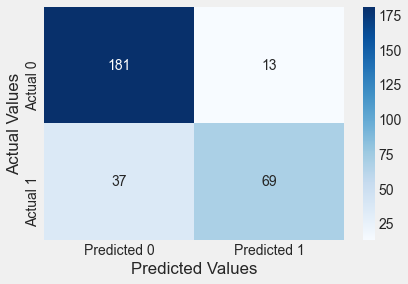

In [15]:
cml,accl= confusion_matrix_train(logit_model)

#for test data only - data and the true test responses 
#given as sepreate input

In [18]:
#Function to compute confusion matrix and prediction accuracy on test data
def confusion_matrix_test(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    plt.show()
    print("Classification accuracy = {:.1%}".format(accuracy)) 
    return cm_df, accuracy

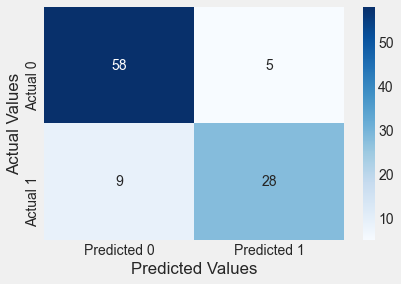

Classification accuracy = 86.0%


In [22]:
cm_test1, acc_test1= confusion_matrix_test(test,test.Purchased,logit_model)

test and traning acc comparalbe - no overfitting 
good performance overall (for one predictor)

Optimization terminated successfully.
         Current function value: 0.358910
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  300
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            2
Date:                Wed, 15 Feb 2023   Pseudo R-squ.:                  0.4474
Time:                        13:23:49   Log-Likelihood:                -107.67
converged:                       True   LL-Null:                       -194.85
Covariance Type:            nonrobust   LLR p-value:                 1.385e-38
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -11.9432      1.424     -8.386      0.000     -14.735      -9.152
Age           

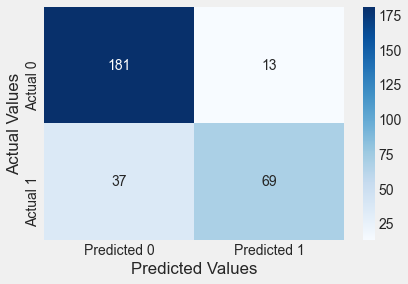

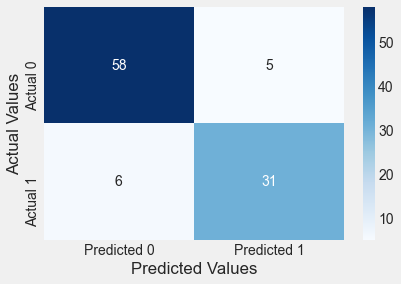

Classification accuracy = 89.0%


In [24]:
logit_model2 = sm.logit(formula = 'Purchased~Age+EstimatedSalary', data = train).fit()
print(logit_model2.summary())
cm2, acc2= confusion_matrix_train(logit_model)
cm_test2, acc_test2= confusion_matrix_test(test,test.Purchased,logit_model2)

Both pred.s are stat. sig
Even better test perfomrance with two stat. sig. var.s 

Optimization terminated successfully.
         Current function value: 0.357327
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  300
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            3
Date:                Wed, 15 Feb 2023   Pseudo R-squ.:                  0.4498
Time:                        13:25:03   Log-Likelihood:                -107.20
converged:                       True   LL-Null:                       -194.85
Covariance Type:            nonrobust   LLR p-value:                 9.150e-38
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.2531      1.478     -8.293      0.000     -15.149      -9.357
Gender[T.Male]

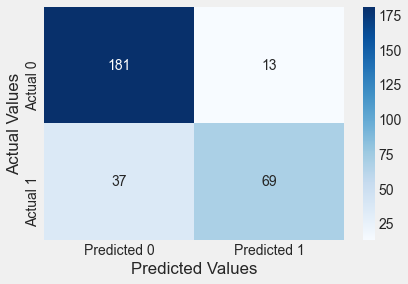

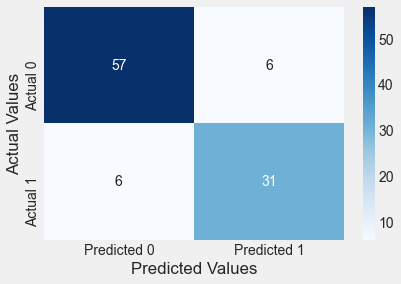

Classification accuracy = 88.0%


In [25]:
logit_model3 = sm.logit(formula = 'Purchased~Age+EstimatedSalary+Gender', data = train).fit()
print(logit_model3.summary())
cm2, acc2= confusion_matrix_train(logit_model)
cm_test2, acc_test2= confusion_matrix_test(test,test.Purchased,logit_model3)

With the stat. insigh. predictor 
    traning acc increased 
    test acc decreased 

Main point: traning acc will ALWAYS increase as you add a new pred, even if its random 
    but test acc decreases if the added pred. is not useful - indication of overfitting

There are a bunch of other mterics to check 

Update the conf matrix helper functions 
    add new metrics 
    make it both for train and test 
    print instead of return 

In [ ]:
def confusion_matrix_data(data,actual_values,model,cutoff= 0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1]) #false negative
    fpr= (cm[0,1])/(cm[0,0]+cm[0,1])# false positive
    precision= (cm[1,1])/(cm[1,1]+cm[0,1])
    tpr= (cm[1,1])/(cm[1,0]+cm[1,1]) #recall 
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    plt.show9
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))

In [ ]:
confusion_matrix_data(test,test.Purchased,logit_model3)


precision and recall both high 
FNR and FPR are in both 10-15% range 

This is not an example with one metric that is particularly important - so we can say good overall 

Sometimes there is a numeric cost of the TP and FP 
    then you need to cal  - multiply the profit with TP and multiply the loss with FP 
